<a href="https://colab.research.google.com/github/joaquincamisasca/Riesgos-y-Oportunidades-en-el-Mundo-Digital-/blob/main/Riesgos_y_Oportunidades_en_el_Mundo_Digital_Camisasca_Benitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RIESGOS Y OPORTUNIDADES EN EL MUNDO DIGITAL**

## **IMPORTACION DE LIBRERIAS Y CONEXION DE API**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from datetime import datetime

In [ ]:
!pip install wbgapi

import wbgapi as wb

try:
    print("✅ Iniciando la creación de la base de datos desde la API del Banco Mundial...")

    # --- PASO 1: DEFINIR LOS INDICADORES Y EL PERÍODO ---
    # Diccionario con los códigos de la API y los nombres que queremos para las columnas.
    indicadores = {
        'SP.DYN.CBRT.IN': 'Birth rate, crude (per 1,000 people)',
        'SP.DYN.CDRT.IN': 'Death rate, crude (per 1,000 people)',
        'EG.USE.ELEC.KH.PC': 'Electric power consumption (kWh per capita)',
        'NY.GDP.MKTP.CD': 'GDP (USD)',
        'NY.GDP.PCAP.CD': 'GDP per capita (USD)',
        'IT.NET.USER.ZS': 'Individuals using the Internet (% of population)',
        'SP.DYN.IMRT.IN': 'Infant mortality rate (per 1,000 live births)',
        'SP.DYN.LE00.IN': 'Life expectancy at birth (years)',
        'EN.POP.DNST': 'Population density (people per sq. km of land area)',
        'SL.UEM.TOTL.ZS': 'Unemployment (% of total labor force) (modeled ILO estimate)',
        'FP.CPI.TOTL.ZG': 'Inflation (% annual)',
        'NY.GDP.MKTP.KD.ZG': 'GDP Growth (% annual)',
        'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    }

    # Definimos el rango de años
    año_actual = datetime.now().year
    years = list(range(1960, año_actual))

    # --- PASO 2: OBTENER Y FILTRAR LA LISTA DE PAÍSES ---
    print("🔄 Obteniendo la lista de economías y filtrando solo los países...")
    df_paises = wb.economy.DataFrame()
    df_paises_filtrado = df_paises[df_paises['aggregate'] == False].copy()
    codigos_paises = df_paises_filtrado.index.tolist()
    df_paises_filtrado = df_paises_filtrado.rename(columns={
        'name': 'Country Name',
        'region': 'Region',
        'incomeLevel': 'IncomeGroup'
    })
    df_paises_filtrado = df_paises_filtrado[['Country Name', 'Region', 'IncomeGroup']]
    print(f"✅ Lista filtrada. Se trabajará con {len(codigos_paises)} países.")

    # --- PASO 3: OBTENER DATOS SOLO PARA LOS PAÍSES FILTRADOS ---
    print(f"🔄 Obteniendo datos de {len(indicadores)} indicadores. Esto puede tardar...")
    df_datos_wide = wb.data.DataFrame(
        list(indicadores.keys()),
        codigos_paises,
        time=years
    ).reset_index()
    print("✅ Datos de indicadores obtenidos.")

    # --- PASO 4: TRANSFORMAR Y LIMPIAR LOS DATOS ---
    print("🔄 Transformando la estructura de los datos...")
    df_largo = pd.melt(df_datos_wide, id_vars=['economy', 'series'], var_name='Year', value_name='Value')
    df_final = df_largo.pivot_table(index=['economy', 'Year'], columns='series', values='Value').reset_index()
    df_final = df_final.rename(columns=indicadores)
    df_final = df_final.rename(columns={'economy': 'Country Code'})
    df_final['Year'] = df_final['Year'].str.replace('YR', '').astype(int)
    print("✅ Datos transformados.")

    # --- PASO 5: UNIR METADATOS CON DATOS ---
    print("🔄 Uniendo metadatos con los datos de indicadores...")
    df_completo = pd.merge(
        df_final,
        df_paises_filtrado,
        left_on='Country Code',
        right_index=True,
        how='left'
    )
    print("✅ Unión completada.")

    # --- PASO 6: ORDENAR Y MOSTRAR RESULTADO (sin cambios) ---
    columnas_ordenadas = [
        'Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year'
    ] + list(indicadores.values())
    df = df_completo[columnas_ordenadas]

    # --- PASO 7: ACTUALIZAR NOMBRES DE REGIONES ---
    print("🔄 Mapeando los nombres completos de las regiones...")
    lista_regiones = wb.region.list()
    df_regiones = pd.DataFrame(lista_regiones)
    mapa_nombres_regiones = df_regiones.set_index('code')['name'].to_dict()
    df['Region'] = df['Region'].map(mapa_nombres_regiones)
    print("✅ Nombres de las regiones actualizados.")

    # --- PASO 8: ACTUALIZAR NOMBRES DE GRUPOS DE INGRESO ---
    print("🔄 Mapeando los nombres completos de los grupos de ingreso...")
    lista_ingresos = wb.income.list()
    df_ingresos = pd.DataFrame(lista_ingresos)
    mapa_nombres_ingresos = df_ingresos.set_index('id')['value'].to_dict()
    df['IncomeGroup'] = df['IncomeGroup'].map(mapa_nombres_ingresos)
    print("✅ Nombres de los grupos de ingreso actualizados.")

    print("\n\n✅ ¡Base de datos creada exitosamente desde cero!")

except Exception as e:
    print(f"\n❌ Ocurrió un error general en el script: {e}")

✅ Iniciando la creación de la base de datos desde la API del Banco Mundial...
🔄 Obteniendo la lista de economías y filtrando solo los países...
✅ Lista filtrada. Se trabajará con 217 países.
🔄 Obteniendo datos de 13 indicadores. Esto puede tardar...
✅ Datos de indicadores obtenidos.
🔄 Transformando la estructura de los datos...
✅ Datos transformados.
🔄 Uniendo metadatos con los datos de indicadores...
✅ Unión completada.
🔄 Mapeando los nombres completos de las regiones...
✅ Nombres de las regiones actualizados.
🔄 Mapeando los nombres completos de los grupos de ingreso...
✅ Nombres de los grupos de ingreso actualizados.


✅ ¡Base de datos creada exitosamente desde cero!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  14076 non-null  object 
 1   Country Code                                                  14076 non-null  object 
 2   Region                                                        14076 non-null  object 
 3   IncomeGroup                                                   14076 non-null  object 
 4   Year                                                          14076 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          13858 non-null  float64
 6   Death rate, crude (per 1,000 people)                          13858 non-null  float64
 7   Electric power consumption (kWh per capita)                   4939 

In [ ]:
df.to_csv('world_bank_dataset.csv', index=False)
print("✅ DataFrame guardado exitosamente como 'world_bank_dataset.csv'")

✅ DataFrame guardado exitosamente como 'world_bank_dataset.csv'


## **DATASET**

**1.- Descripción de los datos.**

Indicadores sociales y economicos de distintos paises a lo largo de los años

Las caracteristicas son las siguientes:
* Volumen de datos: 18 columnas y aproximadamente 14 mil filas
* Historico: desde el año 1960 y solamente con registros anuales
* Fuente: El dataset esta tomado de las API´S del banco mundial en base a variables que se consideran utiles para el analisis

Tipos de Variables:
* Identificadores: nombre país, código país, región, grupo de ingresos.
* Temporales: año.
* Indicadores:
  * Económicos: PBI, PBI per cápita, Tasa de desempleo, Inflación.
  * Digital: Uso de internet, Acceso a la electricidad.
  * Sociales: Tasa de natalidad y mortalidad, Esperanza de vida, Densidad de población.


  **2.- Diccionario de datos.**

**NOMBRES:** Descripcion

1. **Country Name:** nombre del país
2. **Country Code:** nombre del país en 3 letras
3. **Region:** region del mundo en donde pertenece el país
4. **IncomeGroup:** clase economica promedio
5. **Year:** año de los datos
6. **Birth rate, crude (per 1,000 people):** número de nacimientos vivos registrados en una población por cada 1.000 habitantes en un año
7. **Death rate, crude (per 1,000 people):** número de muertes ocurridas en una población por cada 1,000 habitantes en un año
8. **Electric power consumption (kWh per capita):** consumo de electricidad por persona en un año
9. **GDP (USD):** PBI medido en dolares
10. **GDP per capita (USD):** PBI por persona medido en dolares
11. **Individuals using the Internet (% of population):** consumo de internet por persona en un año
12. **Infant mortality rate (per 1,000 live births):** número de bebés que mueren antes de cumplir un año por cada 1,000 nacidos vivos
13. **Life expectancy at birth (years):** cantidad de años que se espera que viva una persona desde su nacimiento
14. **Population density (people per sq. km of land area):** número de personas que habitan en un kilometro cuadrado
15. **Unemployment (% of total labor force) (modeled ILO estimate):** personas que están disponibles para trabajar pero no tienen empleo dentro de la población económicamente activa
16. **Inflation (% annual):** Aumento porcentual en el costo de una canasta de bienes y servicios de consumo durante un año.
17. **GDP Growth (% annual):** Variación porcentual del valor total de la producción de bienes y servicios de un país en un año, ajustada por la inflación.
18. **Access to Electricity (%):** Porcentaje de la población total de un país que tiene acceso a la red eléctrica.

## **OBJETIVO**

**Motivación**

La expansión a nuevos mercados es una de las decisiones más críticas para cualquier empresa del sector digital. Este análisis nace de la necesidad de transformar las suposiciones en decisiones estratégicas basadas en datos, utilizando indicadores socioeconómicos del Banco Mundial para identificar mercados con verdadero potencial de crecimiento y minimizar los riesgos de inversión.

**Audiencia**

Este análisis está dirigido a líderes de negocio, directores de estrategia y equipos de expansión de empresas tecnológicas. Los hallazgos proporcionarán una guía clara para priorizar países y regiones, permitiendo enfocar los recursos de manera inteligente y efectiva.

**Limitaciones del Análisis**

* Datos Faltantes y Estimaciones: El dataset original contenía una cantidad significativa de datos nulos.
* Retraso en la Información: Los datos del Banco Mundial tienen un rezago natural de 1 a 2 años.
* Alcance de los Indicadores: no se incluyen factores culturales, políticos específicos o regulatorios de cada país.

## **ANALISIS EXPLORATORIO DE LOS DATOS**

Se comienza viendo si hay datos nulos en el Dataset y encontramos que muchas columnas no tienen datos por lo que se confirma el problema que se detallo en el contexto.

Por ende, se procede a tratar los datos para generar una informacion mas completa.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  14076 non-null  object 
 1   Country Code                                                  14076 non-null  object 
 2   Region                                                        14076 non-null  object 
 3   IncomeGroup                                                   14076 non-null  object 
 4   Year                                                          14076 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          13858 non-null  float64
 6   Death rate, crude (per 1,000 people)                          13858 non-null  float64
 7   Electric power consumption (kWh per capita)                   4939 

Se generaron varios graficos de tiempo y se ve una tendencia similar: hay muchos datos faltantes desde 1990 para atras y hacen que la media se modifique demasiado.

Viendo algunos ejemplo:


1. **Individuals using the Internet (% of population)**: es logico pensar que no haya datos de 1990 para atras debido a que el internet no existia en esa epoca.
2. **GDP (USD)**: los formas de calcular el PBI cambiaron demasiado en todo este tiempo. Esto hace que los valores viejos distorsionen fuertemente la media de los datos actuales
3. **Life expectancy at birth (years)**: y esto aplica para cualquier indice relacionado con la vida o la muerte, el avance tecnologico en la medicina es tan grande que las mortalidades de hace 50 años no se relacionan en nada con las actuales. De hecho, la esperanza de vida en 1960 es menor a 55 años y en 2010 supera los 70.

Para estos 3 casos se crearon los graficos de tiempo que evidencian estas situaciones.

Se llega a la conclusion de eliminar todos los datos previos de 1990. Es decir, de 1960 a 1989 inclusive.

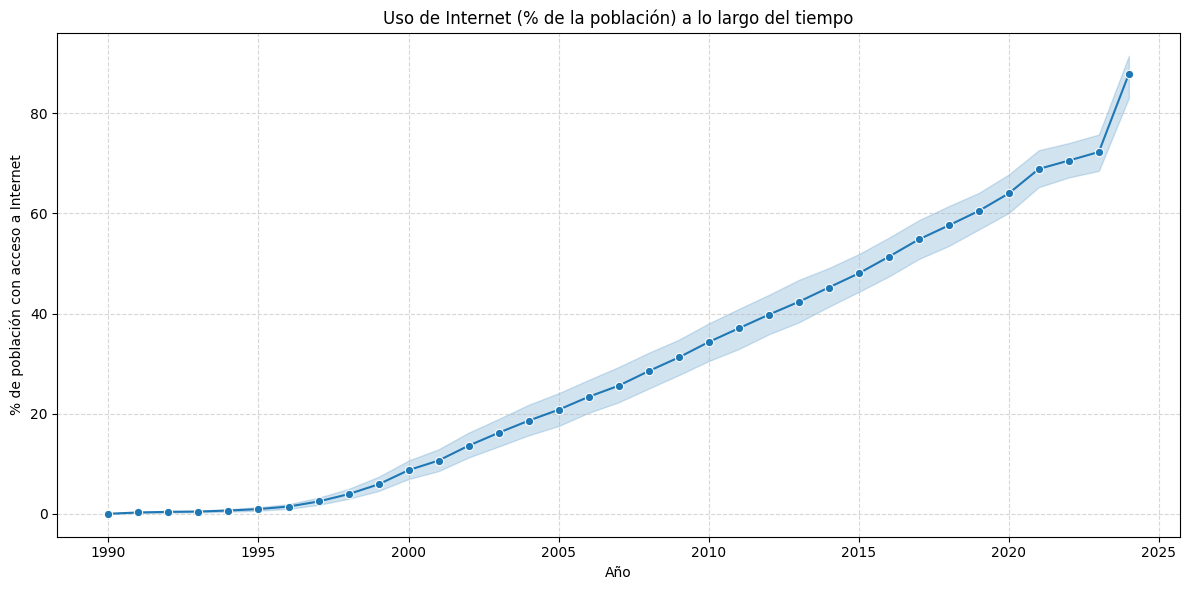

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Year',
    y='Individuals using the Internet (% of population)',
    marker='o'
)

plt.title('Uso de Internet (% de la población) a lo largo del tiempo')
plt.ylabel('% de población con acceso a Internet')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

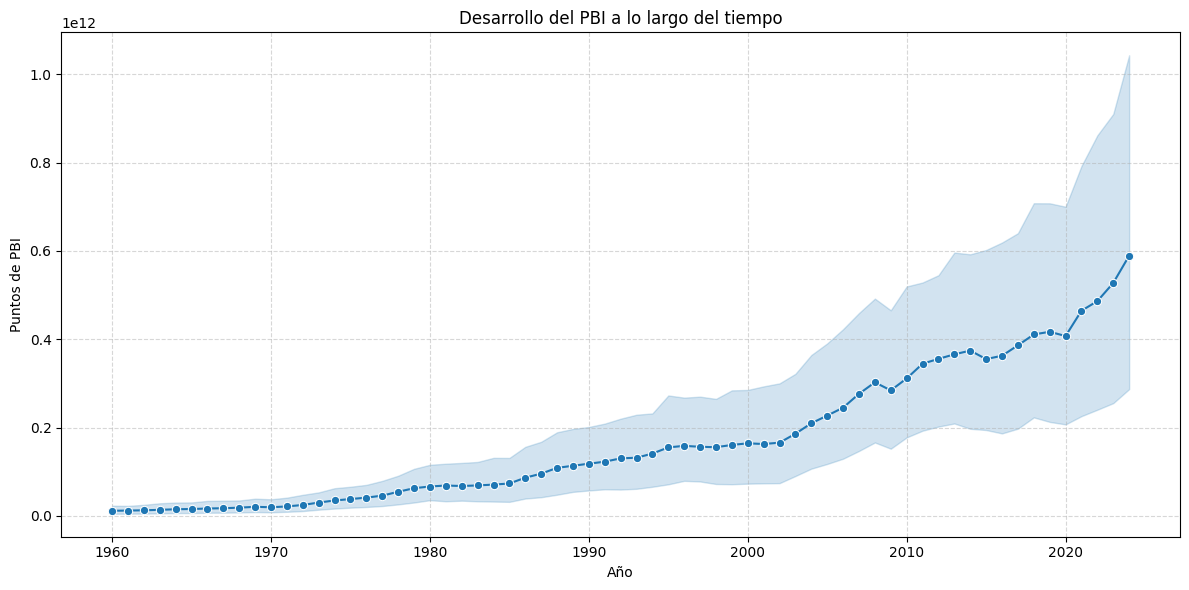

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Year',
    y='GDP (USD)',
    marker='o'
)

plt.title('Desarrollo del PBI a lo largo del tiempo')
plt.ylabel('Puntos de PBI')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

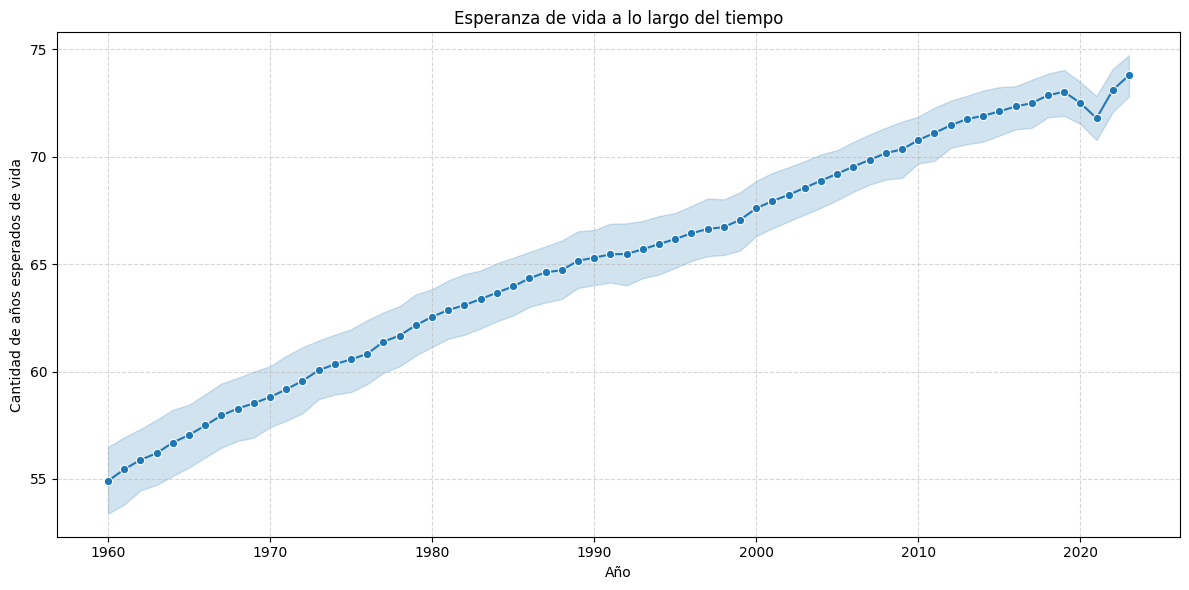

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Year',
    y='Life expectancy at birth (years)',
    marker='o'
)

plt.title('Esperanza de vida a lo largo del tiempo')
plt.ylabel('Cantidad de años esperados de vida')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df_filtrado = df[df['Year'] >= 1990].copy()

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7581 entries, 30 to 14075
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  7581 non-null   object 
 1   Country Code                                                  7581 non-null   object 
 2   Region                                                        7581 non-null   object 
 3   IncomeGroup                                                   7581 non-null   object 
 4   Year                                                          7581 non-null   int64  
 5   Birth rate, crude (per 1,000 people)                          7378 non-null   float64
 6   Death rate, crude (per 1,000 people)                          7378 non-null   float64
 7   Electric power consumption (kWh per capita)                   4939 non-n

Sin embargo, vemos que sigue habiendo bastantes datos nulos en todas las columnas.

Por ende, se procede a rellenar con la media cada una de las columnas. A su vez, no se toma el promedio general de todos los paises, sino que se completa con la de cada pais.

Esto conllevaria a que (por ejemplo), el promedio de PBI de los paises desarrollados no hace que suba abruptamente la de los paises subdesarrollado y genera que se mantenga cierta constancia dentro de cada region.

In [ ]:
df_filtrado['Birth rate, crude (per 1,000 people)'] = (df_filtrado.groupby('Country Name')['Birth rate, crude (per 1,000 people)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Death rate, crude (per 1,000 people)'] = (df_filtrado.groupby('Country Name')['Death rate, crude (per 1,000 people)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Electric power consumption (kWh per capita)'] = (df_filtrado.groupby('Country Name')['Electric power consumption (kWh per capita)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['GDP (USD)'] = (df_filtrado.groupby('Country Name')['GDP (USD)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['GDP per capita (USD)'] = (df_filtrado.groupby('Country Name')['GDP per capita (USD)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Individuals using the Internet (% of population)'] = (df_filtrado.groupby('Country Name')['Individuals using the Internet (% of population)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Infant mortality rate (per 1,000 live births)'] = (df_filtrado.groupby('Country Name')['Infant mortality rate (per 1,000 live births)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Life expectancy at birth (years)'] = (df_filtrado.groupby('Country Name')['Life expectancy at birth (years)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Population density (people per sq. km of land area)'] = (df_filtrado.groupby('Country Name')['Population density (people per sq. km of land area)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Unemployment (% of total labor force) (modeled ILO estimate)'] = (df_filtrado.groupby('Country Name')['Unemployment (% of total labor force) (modeled ILO estimate)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Inflation (% annual)'] = (df_filtrado.groupby('Country Name')['Inflation (% annual)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['GDP Growth (% annual)'] = (df_filtrado.groupby('Country Name')['GDP Growth (% annual)'].transform(lambda x: x.fillna(x.mean())))
df_filtrado['Access to Electricity (%)'] = (df_filtrado.groupby('Country Name')['Access to Electricity (%)'].transform(lambda x: x.fillna(x.mean())))


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7581 entries, 30 to 14075
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  7581 non-null   object 
 1   Country Code                                                  7581 non-null   object 
 2   Region                                                        7581 non-null   object 
 3   IncomeGroup                                                   7581 non-null   object 
 4   Year                                                          7581 non-null   int64  
 5   Birth rate, crude (per 1,000 people)                          7581 non-null   float64
 6   Death rate, crude (per 1,000 people)                          7581 non-null   float64
 7   Electric power consumption (kWh per capita)                   5248 non-n

Una vez obtenido el nuevo dataset, sigue habiendo datos nulos. Sin embargo se ve que hay varios paises con varias columnas nulas.

Una vez investigado esto, vemos que los paises con mas de 3 columnas nulas son islas (Cayman Islands o islas del caribe), principados (Monaco o Liechtenstein) o colonias (Sint Maarten o St. Martin). Es decir, paises con muy poca relevancia.

En conclusion, se decide filtrar aquellas filas que cuenten con 3 o mas columnas nulas.


In [ ]:
df_filtrado[df_filtrado.isna().sum(axis=1) >=3]['Country Name'].unique()

array(['Aruba', 'Andorra', 'American Samoa', 'Bermuda', 'Channel Islands',
       'Cayman Islands', 'Faroe Islands', 'Gibraltar', 'Greenland',
       'Guam', 'Isle of Man', 'Liechtenstein', 'St. Martin (French part)',
       'Monaco', 'Marshall Islands', 'Northern Mariana Islands',
       'Puerto Rico (US)', "Korea, Dem. People's Rep.",
       'French Polynesia', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'British Virgin Islands',
       'Virgin Islands (U.S.)'], dtype=object)

In [ ]:
paises_con_muchos_nulos = df_filtrado[df_filtrado.isna().sum(axis=1) >= 3]['Country Name'].unique()
df_procesado= df_filtrado[~df_filtrado['Country Name'].isin(paises_con_muchos_nulos)]

In [ ]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6788 entries, 94 to 14075
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  6788 non-null   object 
 1   Country Code                                                  6788 non-null   object 
 2   Region                                                        6788 non-null   object 
 3   IncomeGroup                                                   6788 non-null   object 
 4   Year                                                          6788 non-null   int64  
 5   Birth rate, crude (per 1,000 people)                          6788 non-null   float64
 6   Death rate, crude (per 1,000 people)                          6788 non-null   float64
 7   Electric power consumption (kWh per capita)                   5179 non-n

Luego de obtener este filtro vemos que hay varias columnas sin nulos:

1. Birth rate, crude (per 1,000 people)
2. Death rate, crude (per 1,000 people)
3. GDP (USD)
4. GDP per capita (USD)
5. Individuals using the Internet (% of population)
6. Life expectancy at birth (years)
7. GDP Growth (% annual)
8. Access to Electricity (%)


Para las siguientes columnas se hace un trato particular:

1. **Population density (people per sq. km of land area):** esto sucede solamente con Kosovo. Esto es logico ya que este pais esta en guerra el territorio surge por una guerra entre Albania y Serbia, lo que conllevo a una declaracion de independencia por parte de Kosovo, a dia hoy no aceptada por varios paises del mundo. Se procede a eliminar las filas ya que no esta firme la superficie de este pais.
2. **Inflation (% annual):** la falta de datos fiables sobre la inflación en Cuba, Eritrea, Somalia y Turkmenistán se debe a la manipulación y el control gubernamental de la información, la falta de capacidad estadística, los conflictos y la inestabilidad económica. Esto conlleva a una falta de transparencia que dificulta la evaluación de las condiciones económicas.
3. **Electric power consumption (kWh per capita), Infant mortality rate (per 1,000 live births) y Unemployment (% of total labor force) (modeled ILO estimate):** se decide rellenar con un promedio de la region a la que pertence cada pais




In [ ]:
df_procesado[df_procesado['Population density (people per sq. km of land area)'].isna()]['Country Name'].unique()

array(['Kosovo'], dtype=object)

In [ ]:
df_procesado[df_procesado['Inflation (% annual)'].isna()]['Country Name'].unique()

array(['Cuba', 'Eritrea', 'Somalia, Fed. Rep.', 'Turkmenistan'],
      dtype=object)

In [ ]:
paises_a_eliminar = ['Kosovo','Cuba', 'Eritrea', 'Somalia, Fed. Rep.', 'Turkmenistan']
df_final = df_procesado[~df_procesado['Country Name'].isin(paises_a_eliminar)]

In [ ]:
df_final['Electric power consumption (kWh per capita)'] = (df_final.groupby('Region')['Electric power consumption (kWh per capita)'].transform(lambda x: x.fillna(x.mean())))
df_final['Infant mortality rate (per 1,000 live births)'] = (df_final.groupby('Region')['Infant mortality rate (per 1,000 live births)'].transform(lambda x: x.fillna(x.mean())))
df_final['Unemployment (% of total labor force) (modeled ILO estimate)'] = (df_final.groupby('Region')['Unemployment (% of total labor force) (modeled ILO estimate)'].transform(lambda x: x.fillna(x.mean())))

/tmp/ipython-input-3221900655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Electric power consumption (kWh per capita)'] = (df_final.groupby('Region')['Electric power consumption (kWh per capita)'].transform(lambda x: x.fillna(x.mean())))
/tmp/ipython-input-3221900655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Infant mortality rate (per 1,000 live births)'] = (df_final.groupby('Region')['Infant mortality rate (per 1,000 live births)'].transform(lambda x: x.fillna(x.mean()

In [ ]:
df_final = df_final.reset_index(drop=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6613 entries, 0 to 6612
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  6613 non-null   object 
 1   Country Code                                                  6613 non-null   object 
 2   Region                                                        6613 non-null   object 
 3   IncomeGroup                                                   6613 non-null   object 
 4   Year                                                          6613 non-null   int64  
 5   Birth rate, crude (per 1,000 people)                          6613 non-null   float64
 6   Death rate, crude (per 1,000 people)                          6613 non-null   float64
 7   Electric power consumption (kWh per capita)                   6613 no

En conclusion se llega al Dataset definitivo con el cual se va a trabajar con mas de 6 mil filas para el analisis.

## **ANALISIS ESTADISTICO**

Luego de haber tratado la base debido a la alta cantidad de nulos con las que contaba, se obtiene un dataset mucho mas completo que el primero.

La pregunta central que motivara el analisis es la siguiente:

***¿Podemos definir el perfil de un "país ideal" para una expansión digital que sea exitosa y de bajo riesgo a largo plazo?***

Es por es que, en este apartado, se llevaran a cabo las hipotesis previas que se trataran de responder a traves del analisis estadistico con las variables economicas, sociales y digitales. Las preguntas que se hacen son las siguientes:

1. ¿Los países con menor PBI tienden a presentar una mayor tasa de desempleo, limitando así el poder adquisitivo general?
2. ¿Existe una correlación directa entre el PBI per cápita de una región y el porcentaje de su población que utiliza internet?
3. ¿El nivel de ingresos promedio de un país está directamente relacionado con la esperanza de vida de sus habitantes, como indicador de estabilidad?
4. ¿Cómo impacta la inestabilidad económica (medida por la inflación) en la capacidad de un país para adoptar nuevos servicios digitales, incluso si su nivel de ingresos es alto?
5. ¿Es el acceso casi universal a la electricidad un requisito no negociable para considerar a un país como un mercado digital viable y escalable?

Con estas preguntas, se procede a hacer un analisis con graficos del Dataset

### **¿Los países con menor PBI tienden a presentar una mayor tasa de desempleo, limitando así el poder adquisitivo general?**


Se utiliza un grafico de despersion entre las variables del PBI y la tasa de desempleo.

Se ve claramente que las mayores tasas de desempleo estan dadas por los paises con un PBI cercano al 0. Por ende, se puede concluir que si un pais tiene un PBI promedio historico bajo, las tasas de desempleo tienden a ser mas altas.

Esto afectaria fuertemente a cualquier tipo de consumo, sobre todo de servicios digitales donde no es algo primordial para la subsitencia. Siempre se prioriza otras cosas (como alimento, viviendo o ropa) antes que un servicio digital.

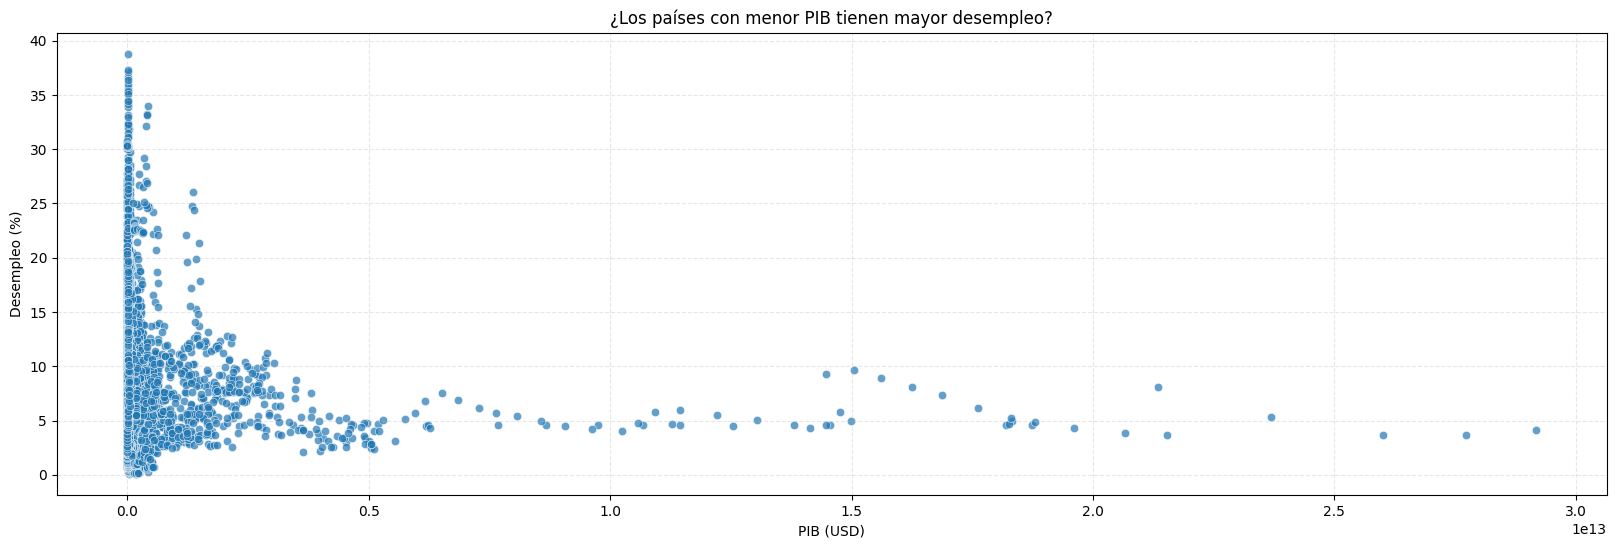

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(
    data=df_final,
    x='GDP (USD)',
    y='Unemployment (% of total labor force) (modeled ILO estimate)',
    alpha=0.7
)
plt.title('¿Los países con menor PIB tienen mayor desempleo?')
plt.xlabel('PIB (USD)')
plt.ylabel('Desempleo (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### **¿Existe una correlación directa entre el PBI per cápita de una región y el porcentaje de su población que utiliza internet?**

Se utiliza un grafico que combina ambos indices. La linea roja muesta el consumo de internet, mientras que los bloques verdes representa el PBI per capita.

Se ve claramente que a medida que crece una variable, crece la otra. Por ende, es logico decir que si el PBI per capita es alto, el consumo de internet es mayor.

Esto muestra una correlacion con la pregunta anterior: ante mayor PBI, se ve que hay mas empleo. Si hay mas gente empleada, el uso de internet crece fuertemente. Esto sucede porque la gente tiene mas poder de consumo, ya que se asegura tener los suministros para sobrevivir y luego empieza a contratar servicios utiles pero no necesarios para vivir. Este grafico confirma esta idea

/tmp/ipython-input-4219997584.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grafico['Region'], rotation=45, ha='right')


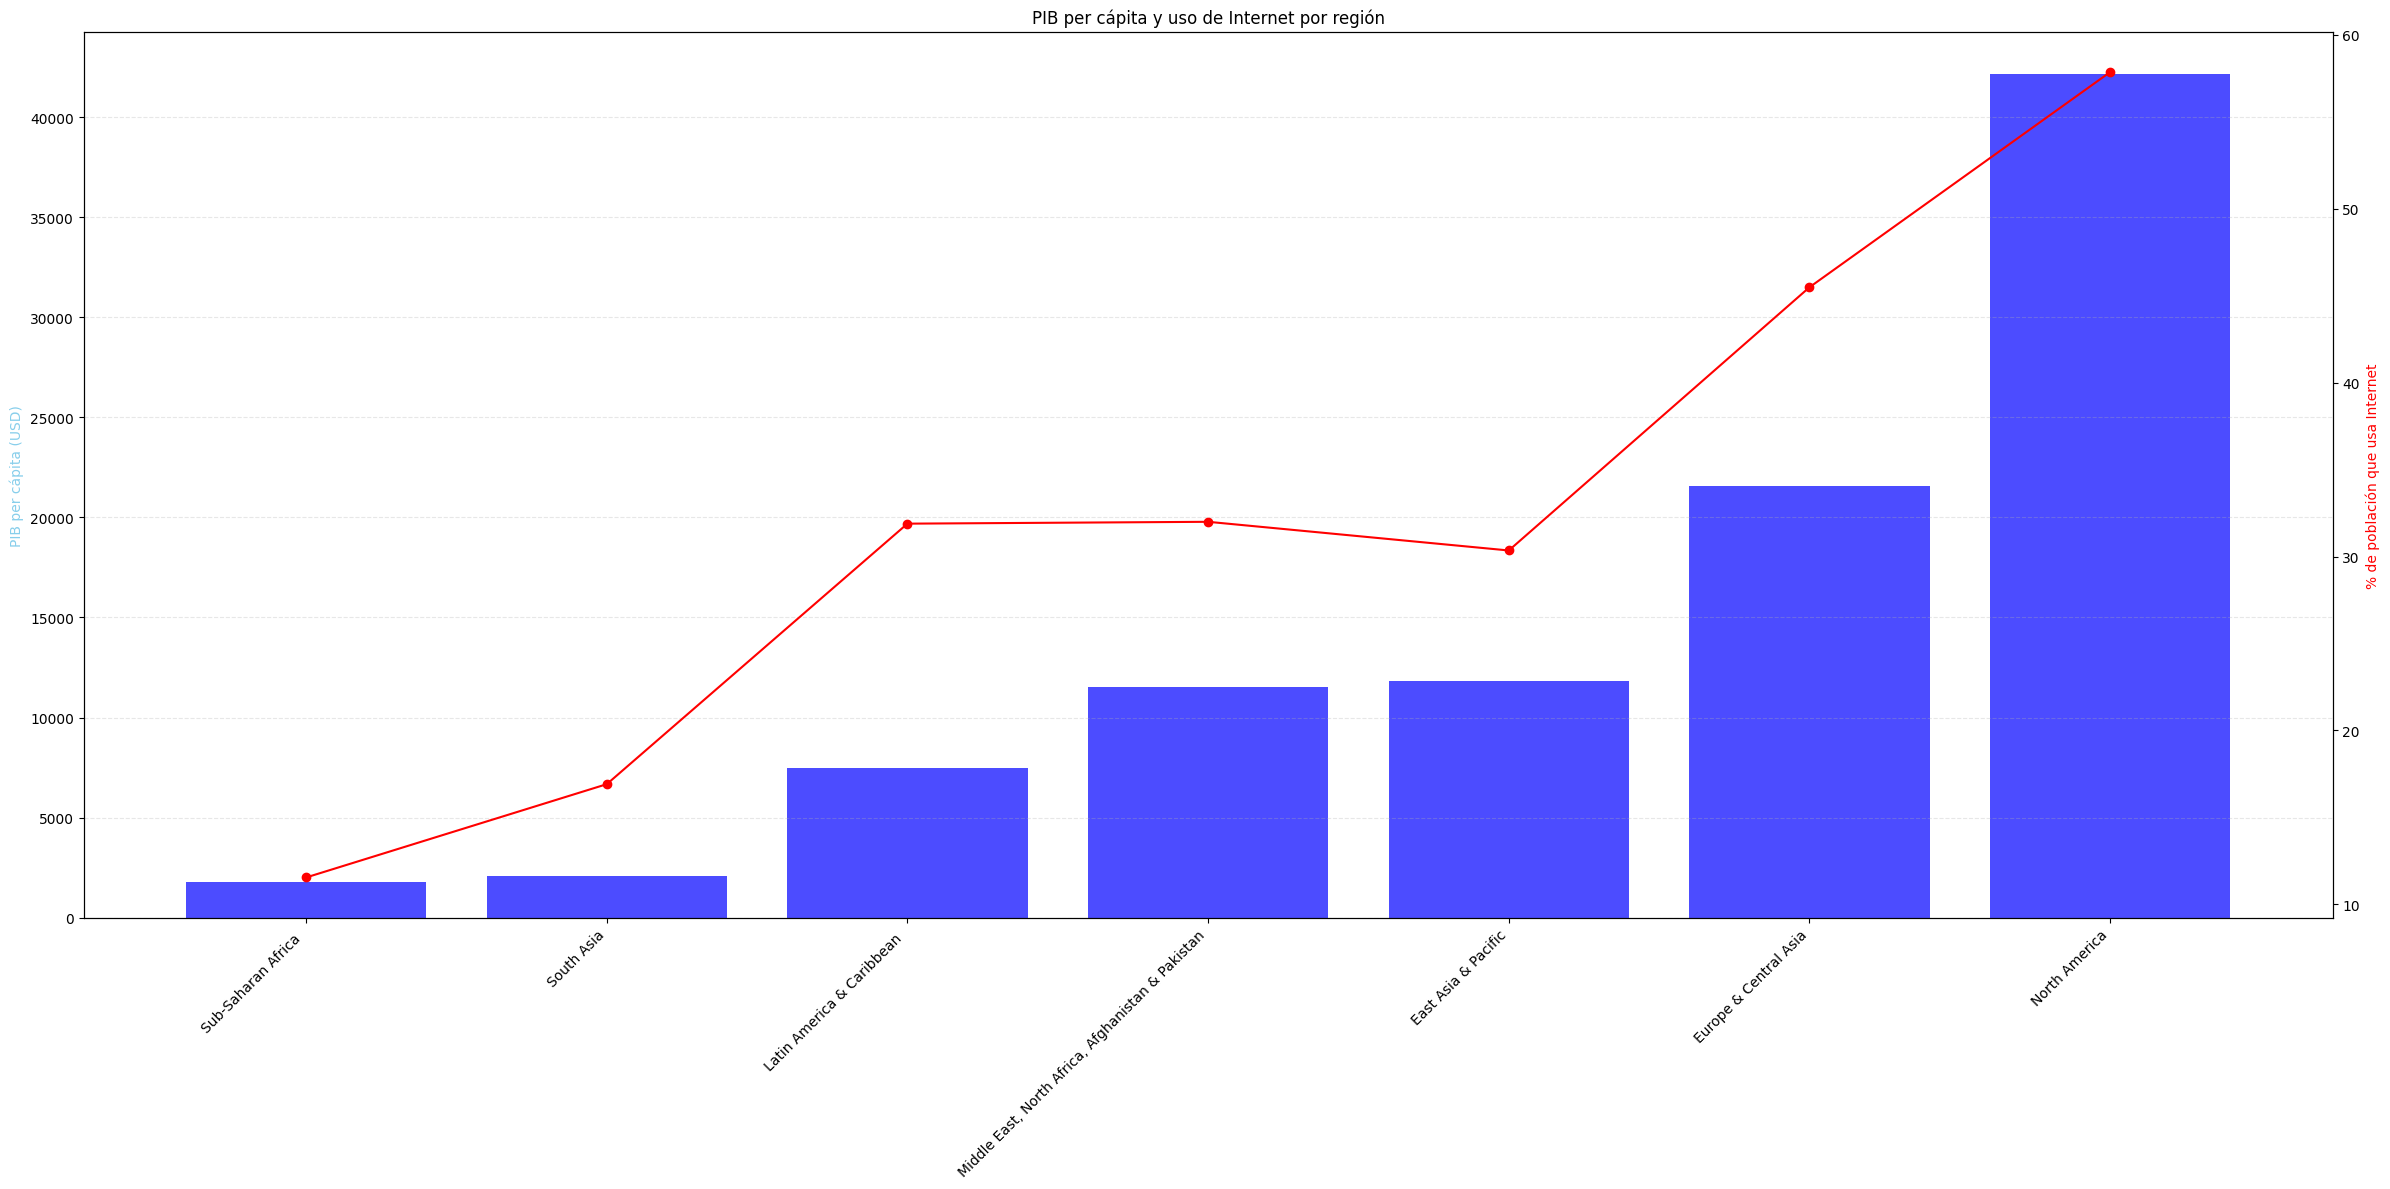

In [ ]:
df_grafico = df_final.groupby('Region', as_index=False)[['GDP per capita (USD)', 'Individuals using the Internet (% of population)']].mean().sort_values('GDP per capita (USD)')

fig, ax1 = plt.subplots(figsize=(24, 12))

ax1.bar(df_grafico['Region'], df_grafico['GDP per capita (USD)'], label='PIB per cápita', alpha=0.7, color='blue')
ax2 = ax1.twinx()
ax2.plot(df_grafico['Region'], df_grafico['Individuals using the Internet (% of population)'],
         color='red', marker='o', label='% Uso de internet')

ax1.set_ylabel('PIB per cápita (USD)', color='skyblue')
ax2.set_ylabel('% de población que usa Internet', color='red')
plt.title('PIB per cápita y uso de Internet por región')

ax1.set_xticklabels(df_grafico['Region'], rotation=45, ha='right')

ax1.grid(axis='y', linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()

### **¿El nivel de ingresos promedio de un país está directamente relacionado con la esperanza de vida de sus habitantes, como indicador de estabilidad?**

En este caso, se tomo la medida de mortalidad relacionada con la esperanza de vida desde el nacimiento en comparacion con el grupo de clasificacion de ingresos promedio de cada pais.

Vemos que a mayor clase social promedio, mayor es la esperanza de vida. Por ende, hay una correlacion directa entre ingresos y años esperados de vida.

Para un empresa que intenta ingresar y sostenerse en algun pais, les conviene que sean paises con esperanza de vida mas alto. Esto sucede porque las poblaciones tienen a ser mas altas porque la gente vive mas y mejor. A su vez, si la gente vive mejor, puede contratar mas servicios que no son necesarios para sobrevivir.

/tmp/ipython-input-4276718771.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=group_order, patch_artist=True)


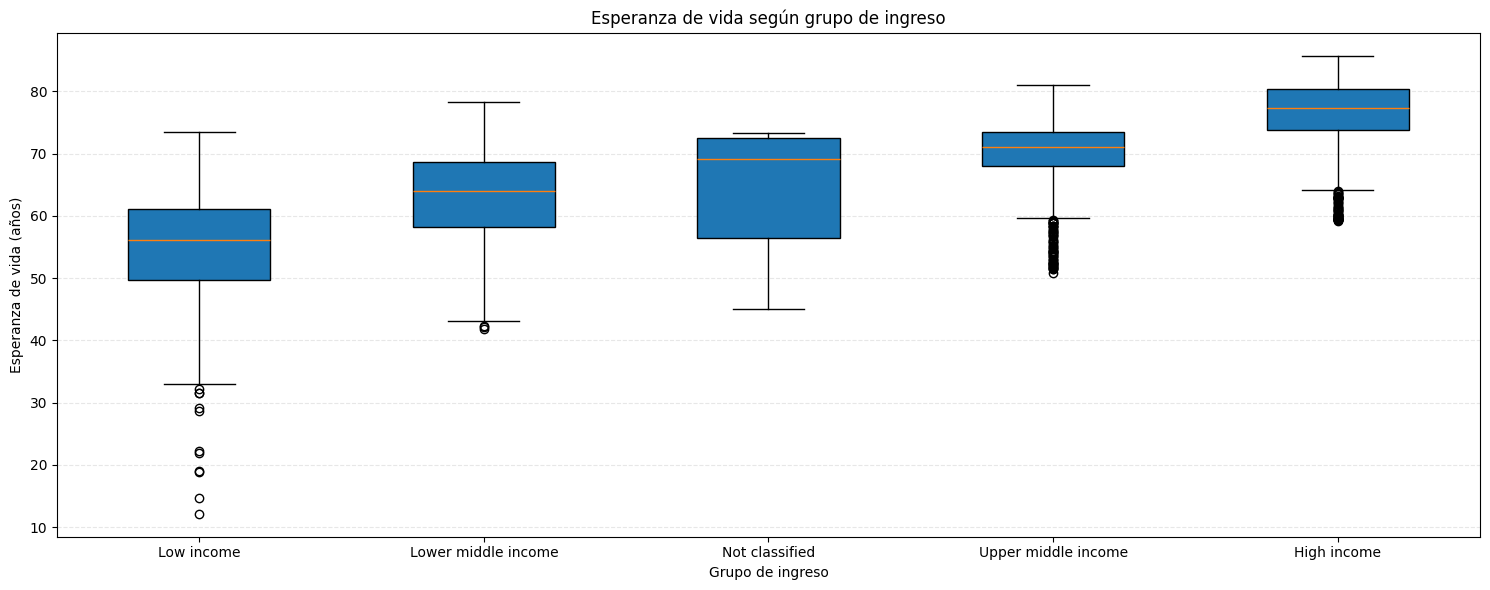

In [ ]:
group_order = df_final.groupby('IncomeGroup')['Life expectancy at birth (years)'].mean().sort_values().index

data = [df_final[df_final['IncomeGroup'] == group]['Life expectancy at birth (years)']
        for group in group_order]

plt.figure(figsize=(15, 6))
plt.boxplot(data, labels=group_order, patch_artist=True)
plt.title('Esperanza de vida según grupo de ingreso')
plt.xlabel('Grupo de ingreso')
plt.ylabel('Esperanza de vida (años)')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### **¿Cómo impacta la inestabilidad económica (medida por la inflación) en la capacidad de un país para adoptar nuevos servicios digitales, incluso si su nivel de ingresos es alto?**

Aquí, se cruzó el nivel de uso de internet de los países en comparación con su categoría de riesgo por inflación (Baja, Moderada o Alta).

Vemos que la gran mayoría de los casos de alto uso de internet (900 registros) ocurren en países con baja inflación, una cifra que se desploma a medida que la inflación aumenta. Por ende, se puede concluir que la inestabilidad económica (alta inflación) tiene una correlación negativa con la adopción de tecnología digital.

Para una empresa que busca expandirse, este análisis de riesgo es crucial. Les conviene priorizar países con un historial de baja inflación y estabilidad económica. Esto sucede porque la inflación erosiona el poder de compra y la confianza del consumidor, haciendo que la población dude en gastar en servicios no esenciales, como los digitales, y generando un clima de incertidumbre que es adverso para la inversión y el crecimiento a largo plazo.

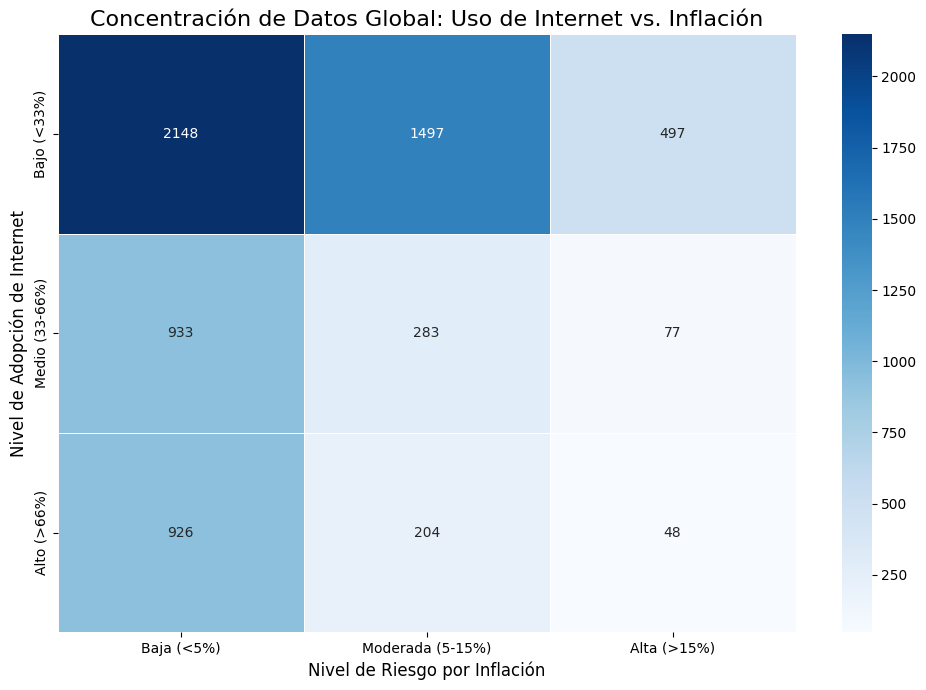

In [ ]:
bins_inflacion = [-float('inf'), 5, 15, float('inf')]
labels_inflacion = ['Baja (<5%)', 'Moderada (5-15%)', 'Alta (>15%)']
df_final['Inflation Category'] = pd.cut(df_final['Inflation (% annual)'], bins=bins_inflacion, labels=labels_inflacion)


bins_internet = [-1, 33, 66, float('inf')]
labels_internet = ['Bajo (<33%)', 'Medio (33-66%)', 'Alto (>66%)']
df_final['Internet Category'] = pd.cut(df_final['Individuals using the Internet (% of population)'], bins=bins_internet, labels=labels_internet)


heatmap_data_total = pd.crosstab(df_final['Internet Category'], df_final['Inflation Category'], dropna=False)


plt.figure(figsize=(10, 7))
sns.heatmap(
    heatmap_data_total,
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=.5
)

plt.title('Concentración de Datos Global: Uso de Internet vs. Inflación', fontsize=16)
plt.xlabel('Nivel de Riesgo por Inflación', fontsize=12)
plt.ylabel('Nivel de Adopción de Internet', fontsize=12)

plt.tight_layout()
plt.show()

### **¿Es el acceso casi universal a la electricidad un requisito no negociable para considerar a un país como un mercado digital viable y escalable?**

En este caso, se analizó la relación entre el porcentaje de acceso a la electricidad de un país en comparación con el porcentaje de su población que utiliza internet.

Vemos que es prácticamente inexistente un escenario de alto uso de internet sin un acceso casi total a la electricidad. Los datos se concentran en dos grupos: países con bajos niveles en ambos indicadores y países con altos niveles en ambos. Por ende, existe una correlación directa y una clara relación de dependencia.

Para una empresa del sector digital, este hallazgo es determinante. Les conviene filtrar y enfocarse exclusivamente en países que ya tengan una infraestructura eléctrica consolidada. Esto sucede porque la electricidad no es solo un indicador de desarrollo, sino el requisito técnico indispensable para que la población pueda consumir cualquier tipo de producto o servicio digital de manera masiva y sostenida.

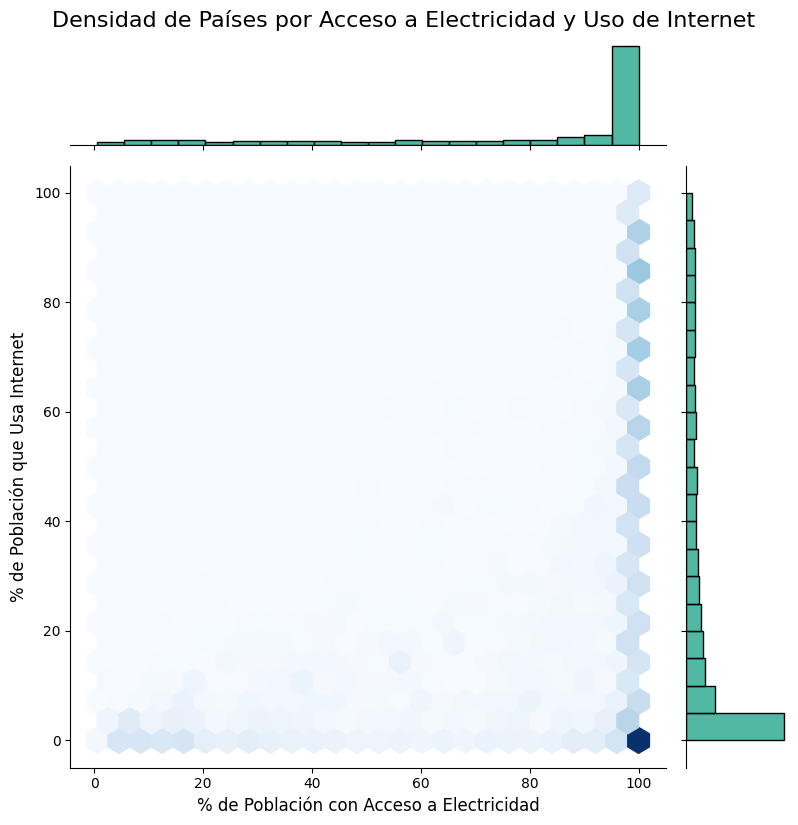

In [ ]:
df_hex = df_final.dropna(subset=['Access to Electricity (%)', 'Individuals using the Internet (% of population)'])

g = sns.jointplot(
    data=df_hex,
    x='Access to Electricity (%)',
    y='Individuals using the Internet (% of population)',
    kind='hex',
    height=8,
    cmap='Blues',
    gridsize=25,
    marginal_kws=dict(bins=20, color='#16a085')
)

g.fig.suptitle('Densidad de Países por Acceso a Electricidad y Uso de Internet', y=1.02, fontsize=16)
g.ax_joint.set_xlabel('% de Población con Acceso a Electricidad', fontsize=12)
g.ax_joint.set_ylabel('% de Población que Usa Internet', fontsize=12)

plt.show()

## **INSIGHTS y RECOMENDACIONES**




Insights

* **Insight Económico:** Se confirma que los países con economías robustas (alto PBI) y estables (baja inflación) presentan consistentemente los niveles más altos de adopción digital. La fortaleza económica es la base del consumo digital.
* **Insight Social:** El bienestar de la población (medido por la esperanza de vida) es un fuerte indicador de la estabilidad de un mercado, un factor clave para atraer inversiones y asegurar el crecimiento a largo plazo.
* **Insight Digital:** La adopción de servicios digitales no es solo una cuestión de interés, sino de capacidad económica. La fuerte correlación entre el ingreso per cápita y el uso de internet demuestra que el desarrollo económico es el principal motor que acelera la digitalización de un país.
* **Insight de Infraestructura:** El análisis demuestra que la infraestructura básica no es negociable. El acceso casi total a la electricidad (>95%) es una condición indispensable para la masificación de internet.
* **Insight de Riesgo:** La inestabilidad económica, incluso en países ricos, actúa como un freno directo. Una inflación moderada o alta reduce drásticamente la probabilidad de una alta penetración de servicios digitales.

Recomendaciones Estratégicas

1. Perfil de Empresa: Expansión de Bajo Riesgo y Crecimiento Sostenible
Recomendación: Enfocar la inversión en países de Ingresos Altos y Medio-Altos que demuestren estabilidad macroeconómica (PBI en crecimiento e inflación controlada).
    * Oportunidades (Pros):
      * Población con alto y consolidado poder adquisitivo.
      * Infraestructura digital y eléctrica completamente desarrollada.
      * Mercado estable y predecible para un crecimiento a largo plazo.
    * Desafíos (Cons):
      * Mercados con alta competencia ya establecida.
      * El crecimiento puede ser más lento al ser mercados ya maduros.
2. Perfil de Empresa: Expansión de Alto Crecimiento (Aceptando Mayor Riesgo)
Recomendación: Identificar países de Ingresos Medios que muestren una tendencia clara de crecimiento del PBI y una inflación a la baja en los últimos años.
    * Oportunidades (Pros):
      * Potencial de crecimiento exponencial al ser de los "primeros en llegar".
      * Menor competencia inicial que en los mercados desarrollados.
      * Posibilidad de capturar una gran cuota de mercado rápidamente.
    * Desafíos (Cons):
      * Alta vulnerabilidad a la inestabilidad económica o política regional.
      * El poder adquisitivo de la población es más volátil.
      * La infraestructura podría no estar completamente consolidada en todo el territorio.

El proyecto se encuentra disponible en GitHub con el siguiente link:

https://github.com/joaquincamisasca/Riesgos-y-Oportunidades-en-el-Mundo-Digital-/blob/main/Riesgos_y_Oportunidades_en_el_Mundo_Digital.ipynb